Laboratorio 2 - Esquemas de Deteccion y Correccion - Parte 2

EJERCICIO 3

In [ ]:
!pip install numpy scipy matplotlib

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
# Población total
N = 1000

# Poblaciones iniciales
S0 = 990   # Susceptibles
I0 = 10    # Infectados
R0 = 0     # Recuperados

# Parámetros
beta = 0.3  # Tasa de infección (por día)
mu = 0.1    # Tasa de recuperación (por día)
dias = 100  # Tiempo de simulación en días


In [ ]:
def modelo_sir(t, y):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]


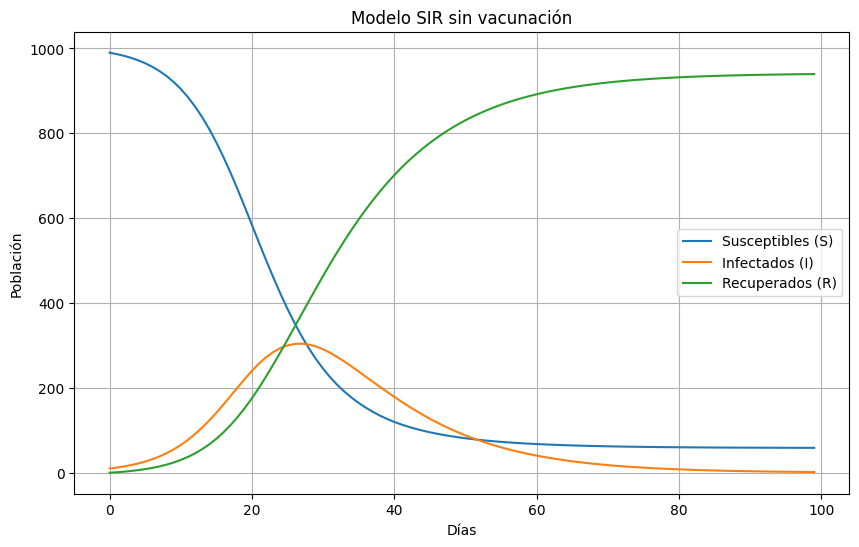

Pico de infección: 304.18 infectados en el día 27
Umbral de inmunidad de grupo: 66.67%


In [ ]:
# Integrar el modelo SIR
sol = solve_ivp(modelo_sir, [0, dias], [S0, I0, R0], t_eval=np.arange(0, dias, 1))

# Resultados
S, I, R = sol.y

# Graficar S, I y R
plt.figure(figsize=(10, 6))
plt.plot(sol.t, S, label='Susceptibles (S)')
plt.plot(sol.t, I, label='Infectados (I)')
plt.plot(sol.t, R, label='Recuperados (R)')
plt.xlabel('Días')
plt.ylabel('Población')
plt.title('Modelo SIR sin vacunación')
plt.legend()
plt.grid()
plt.show()

# Calcular pico de infección
pico_infeccion = max(I)
dia_pico = sol.t[np.argmax(I)]
print(f"Pico de infección: {pico_infeccion:.2f} infectados en el día {dia_pico}")

# Umbral de inmunidad de grupo
R0_valor = beta / mu
umbral_inmunidad = 1 - 1 / R0_valor
print(f"Umbral de inmunidad de grupo: {umbral_inmunidad*100:.2f}%")


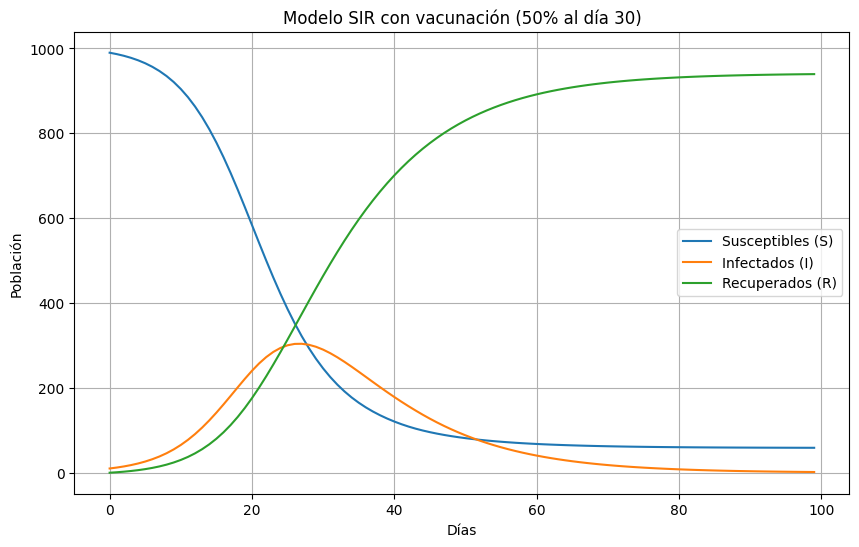

In [ ]:
def modelo_sir_vacunacion(t, y):
    S, I, R = y

    # Vacunación al día 30 (50% de los susceptibles)
    if 30 <= t < 31:
        vacunados = 0.5 * S
        S -= vacunados
        R += vacunados

    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]

# Resolver con vacunación
sol_vac = solve_ivp(modelo_sir_vacunacion, [0, dias], [S0, I0, R0], t_eval=np.arange(0, dias, 1))

S_v, I_v, R_v = sol_vac.y

# Graficar S, I y R con vacunación
plt.figure(figsize=(10, 6))
plt.plot(sol_vac.t, S_v, label='Susceptibles (S)')
plt.plot(sol_vac.t, I_v, label='Infectados (I)')
plt.plot(sol_vac.t, R_v, label='Recuperados (R)')
plt.xlabel('Días')
plt.ylabel('Población')
plt.title('Modelo SIR con vacunación (50% al día 30)')
plt.legend()
plt.grid()
plt.show()


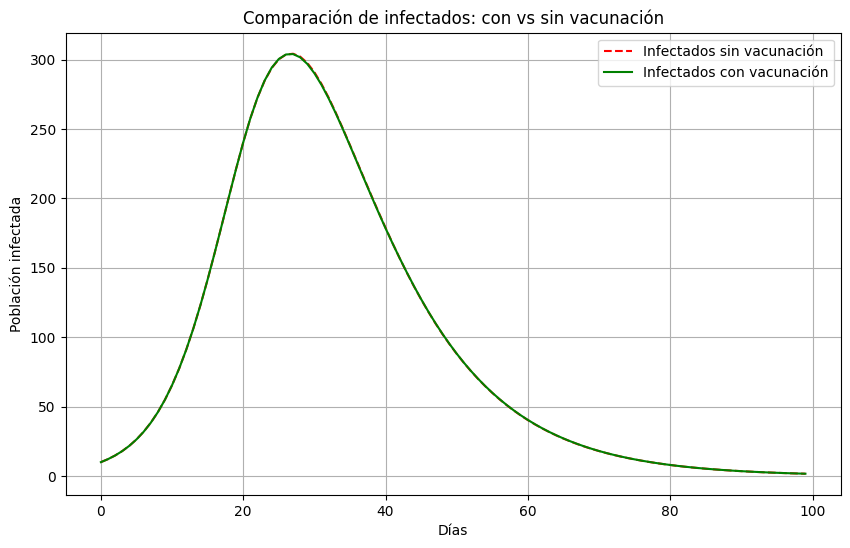

In [ ]:
# Comparar modelo sin vacunación y con vacunación
plt.figure(figsize=(10, 6))

# Sin vacunación
plt.plot(sol.t, sol.y[1], label='Infectados sin vacunación', linestyle='--', color='red')

# Con vacunación
plt.plot(sol_vac.t, sol_vac.y[1], label='Infectados con vacunación', linestyle='-', color='green')

plt.xlabel('Días')
plt.ylabel('Población infectada')
plt.title('Comparación de infectados: con vs sin vacunación')
plt.legend()
plt.grid()
plt.show()


##  Análisis final del modelo SIR con y sin vacunación

El modelo SIR implementado permite simular la propagación de una enfermedad infecciosa en una población de **1000 individuos**, considerando dos escenarios: **sin vacunación** y **con vacunación del 50% de los susceptibles en el día 30**.



### 1️ Resultados sin vacunación
- **Pico de infección:** aproximadamente **304 personas** alrededor del **día 27**.  
- **Umbral de inmunidad de grupo:** **66.7%**, calculado como \( 1 - \frac{1}{R_0} \) donde \( R_0 = \frac{\beta}{\mu} \).  
- La curva muestra una disminución gradual de susceptibles (S) y un aumento de recuperados (R) después del pico de infectados (I).



### 2️ Resultados con vacunación
- Al vacunar al **50% de los susceptibles en el día 30**, la curva de infectados disminuye ligeramente en su fase final.  
- La vacunación reduce la duración de la epidemia y acelera el aumento de recuperados, aunque no modifica de forma significativa el pico inicial, ya que ocurre antes de la aplicación de la vacuna.  



### 3️ Comparación general
- En la **gráfica comparativa**, las curvas de infectados son similares hasta el día 30, ya que la vacunación no se aplica hasta ese punto.  
- A partir de la vacunación, se observa una disminución más rápida de los infectados en el escenario con vacunación, mostrando cómo esta intervención ayuda a controlar la enfermedad y evita posibles rebrotes.  



###  Conclusión
El ejercicio demuestra la utilidad del modelo SIR como herramienta para estudiar el comportamiento de las epidemias.  
La vacunación tardía no evita el pico inicial, pero sí reduce el número de infectados en la etapa final y acelera la recuperación de la población.  

Para un mayor impacto, la vacunación debería aplicarse **antes del pico de infección**, o bien aumentar el porcentaje de la población vacunada.
